In [1]:
import ROOT
from ROOT import *

import numpy as np

import sys
sys.path.append('../')

from src.constants import *

Welcome to JupyROOT 6.22/06


In [2]:
kin_file = TFile("../output/ROOT/kin_results.root")
kin_tree = kin_file.kin_tree

In [5]:
gStyle.SetOptStat(0)

In [3]:
# calculate momentum
def get_p(E, E0, dir):
    dir = np.array(dir) # cast to array if not
    p = sqrt(E**2 - E0**2)
    return p*dir

Warning in <TFile::Append>: Replacing existing TH1: del_p (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: del_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pz (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: e_nuebar (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file ../output/plots/sanity_checks/conservation_of_momentum.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file ../output/plots/sanity_checks/conservation_of_energy.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file ../output/plots/sanity_checks/pz.png has been created


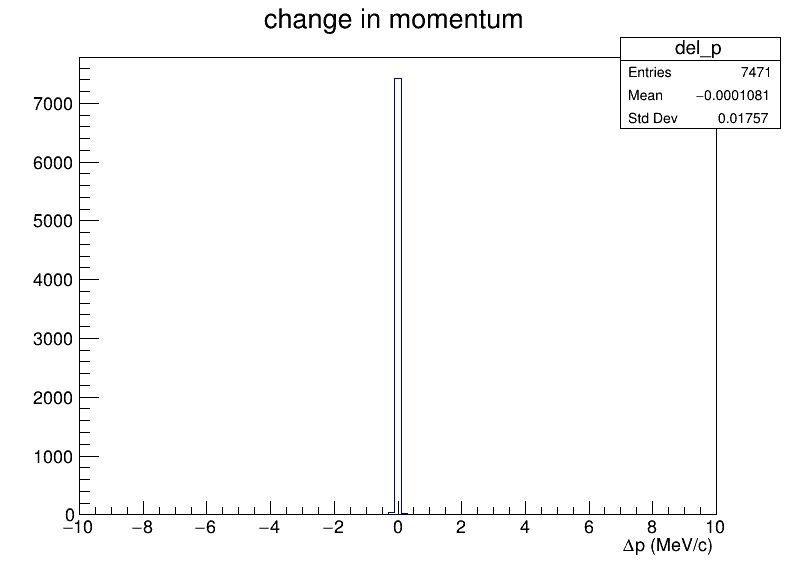

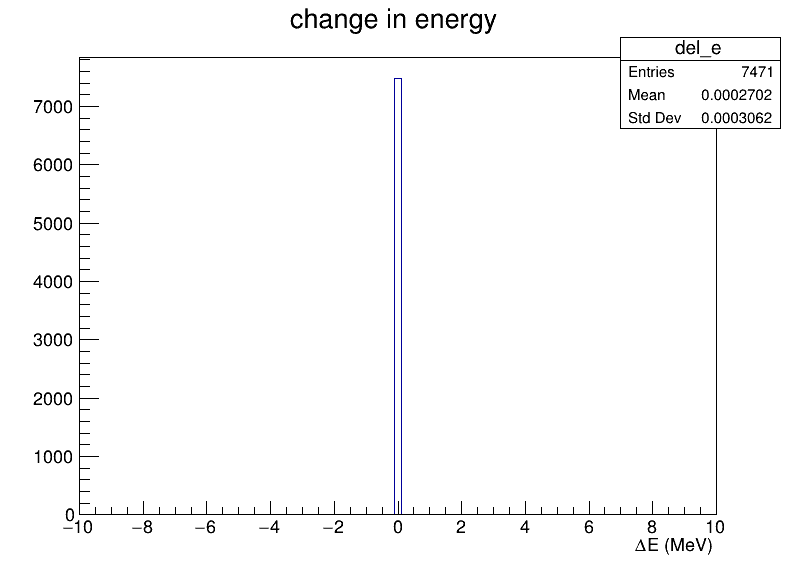

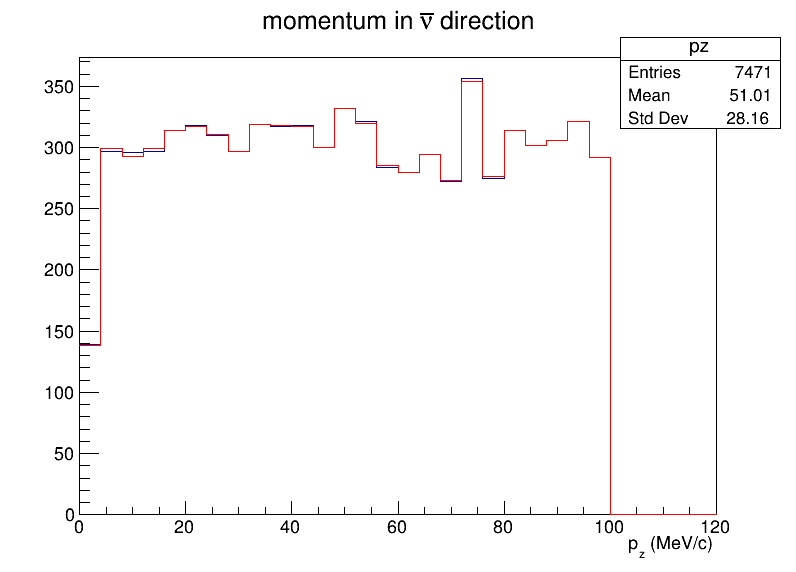

In [5]:
del_p = TH1F("del_p", "change in momentum", 101, -10, 10)
del_e = TH1F("del_e", "change in energy", 101, -10, 10)

pz = TH1F("pz", "momentum in #bar{#nu} direction", 30, 0, 120)
e_nuebar = TH1F("e_nuebar", "incoming momentum", 30, 0, 120)

for e in kin_tree:
    incoming = e.nuebar_energy
    
    e_nuebar.Fill(incoming)
    
    outcoming = get_p(e.ebar_energy, e0_e, [e.ex, e.ey, e.ez]) + \
                get_p(e.n_energy, e0_n, [e.nx, e.ny, e.nz])
    pz.Fill(-outcoming[2]) # negative z direction
    
    outcoming = np.linalg.norm(outcoming)
    
    p_diff = outcoming - incoming
    
    del_p.Fill(p_diff)
    
    del_e.Fill(incoming + e0_p - e.n_energy - e.ebar_energy)

del_p.GetXaxis().SetTitle("#Deltap (MeV/c)")
del_e.GetXaxis().SetTitle("#DeltaE (MeV)")
    
c1 = TCanvas("c1", "c1", 800, 600)
del_p.Draw("HIST")
c1.Draw()
c1.SaveAs("../output/plots/sanity_checks/conservation_of_momentum.png")

c2 = TCanvas("c2", "c2", 800, 600)
del_e.Draw("HIST")
c2.Draw()
c2.SaveAs("../output/plots/sanity_checks/conservation_of_energy.png")


c3 = TCanvas("c3", "c3", 800, 600)
pz.Draw("HIST")
e_nuebar.SetLineColor(kRed)
pz.GetXaxis().SetTitle("p_{z} (MeV/c)")
e_nuebar.Draw("SAME")
c3.Draw()
c3.SaveAs("../output/plots/sanity_checks/pz.png")

In [35]:
x = np.array([0, 1, 1])
np.linalg.norm(x)

1.4142135623730951

In [3]:
e0_p

938.272